In [11]:
# Memprediksi Harga Rumah dengan 3 kamar tidur, jumlah kamar mandi 2, luas rumah 1800 sqt, grade rumah 7, dan tahun pembangunan tahun 1990
# Machine Learning Multiple Linear Regression (Supervised Learning)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [50]:
# Load Data Set Housing.csv
df =pd.read_csv('Downloads/Datasets Phyton/kc_house_data.csv', usecols=['bedrooms','bathrooms','sqft_living','grade','price','yr_built'])



In [51]:
# Data Frame dari Data
df


,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987
...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,8,2009
21609,400000.0,4,2.50,2310,8,2014
21610,402101.0,2,0.75,1020,7,2009
21611,400000.0,3,2.50,1600,8,2004


In [52]:
# 5 Baris Teratas
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1.00,1180,7,1955
1,538000.0,3,2.25,2570,7,1951
2,180000.0,2,1.00,770,6,1933
3,604000.0,4,3.00,1960,7,1965
4,510000.0,3,2.00,1680,8,1987


In [53]:
# mengetahui jumlah kolom dan baris dari data,
# Data memiliki 6 kolom (features),dengan 21613 baris  
df.shape


(21613, 6)

In [16]:
# Melihat informasi data,jumlah data, tipe data, memory yang digunakan
# data sudah berbentuk numerik
df.info

<bound method DataFrame.info of                id             date     price  bedrooms  bathrooms  \
0      7129300520  20141013T000000  221900.0         3       1.00   
1      6414100192  20141209T000000  538000.0         3       2.25   
2      5631500400  20150225T000000  180000.0         2       1.00   
3      2487200875  20141209T000000  604000.0         4       3.00   
4      1954400510  20150218T000000  510000.0         3       2.00   
...           ...              ...       ...       ...        ...   
21608   263000018  20140521T000000  360000.0         3       2.50   
21609  6600060120  20150223T000000  400000.0         4       2.50   
21610  1523300141  20140623T000000  402101.0         2       0.75   
21611   291310100  20150116T000000  400000.0         3       2.50   
21612  1523300157  20141015T000000  325000.0         2       0.75   

       sqft_living  sqft_lot  floors  waterfront  view  ...  grade  \
0             1180      5650     1.0           0     0  ...      7   

In [54]:
# Melihat Statistics Decription dari data, mulai dari mean,kwartil, stardard deviasation
df.describe()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
count,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,7.656873,1971.005136
std,3.671272e+05,0.930062,0.770163,918.440897,1.175459,29.373411
min,7.500000e+04,0.000000,0.000000,290.000000,1.000000,1900.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,7.000000,1951.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.000000,1975.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,8.000000,1997.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,13.000000,2015.000000


In [55]:
# Merubah tipe data dari bedroom yang semula float menjadi Integer
df['bathrooms']= df['bathrooms'].astype('int')


In [56]:
# Mengganti nilai 33 menjadi 3
df['bedrooms']= df['bedrooms'].replace(33,3)


In [20]:
# Mencari dan menangani missing value (Nilai yang kosong)
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [57]:
# Exploratory Data Analysis (EDA)
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


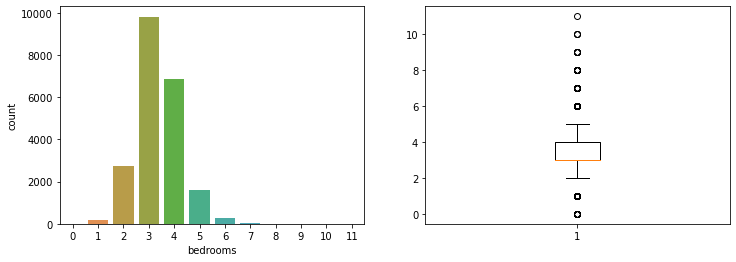

In [58]:
# Univariate Analysis bedroom
# Melihat distribusi dari bedrooms
# Dari hasil plot dapat kita lihat sebagian jumlah kamar tidur  
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
sns.countplot(df['bedrooms'])

f.add_subplot(1, 2, 2)
plt.boxplot(df['bedrooms'])
plt.show()


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


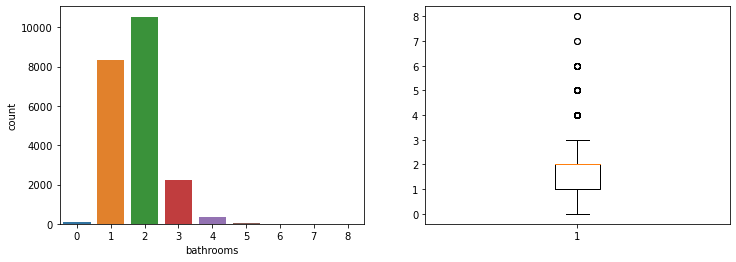

In [59]:
# Univariate Analysis dari Bathrooms
# Melihat distribusi dari Bathrooms
# Jumlah kamar mandi paling banyak berjumlah 3 dan 4

f = plt.figure(figsize=(12,4))
f.add_subplot(1, 2, 1)
sns.countplot(df['bathrooms'])

f.add_subplot (1, 2, 2)
plt.boxplot(df['bathrooms'])
plt.show()            
            

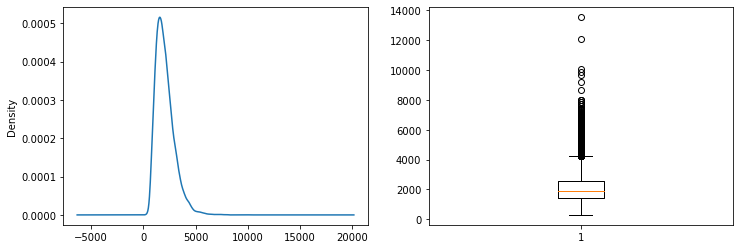

In [60]:
# Univariate analysis sqlft_living
# Melihat distribusi dari sqlft_living
# Density dari distribusi luas rumah sekitar 2000
# Banyak Outliers

f = plt.figure(figsize=(12,4))
f.add_subplot(1, 2, 1)
df['sqft_living'].plot(kind='kde')

f.add_subplot(1, 2, 2)
plt.boxplot(df['sqft_living'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


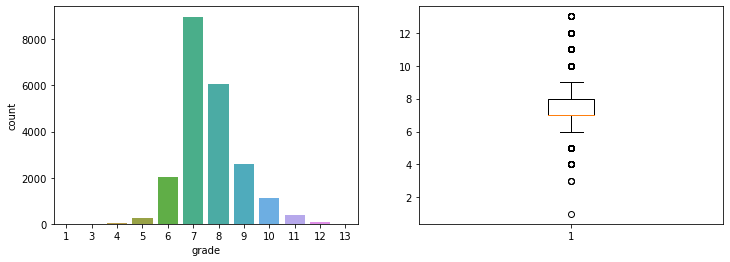

In [61]:
# Univariate analysis Grade
# Melihat distrubusi dari grade
# sebagian besar rumah memiliki grade 7 dan 8
f =plt.figure(figsize=(12,4))
f.add_subplot( 1, 2, 1)
sns.countplot(df['grade'])

f.add_subplot(1, 2, 2)
plt.boxplot(df['grade'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


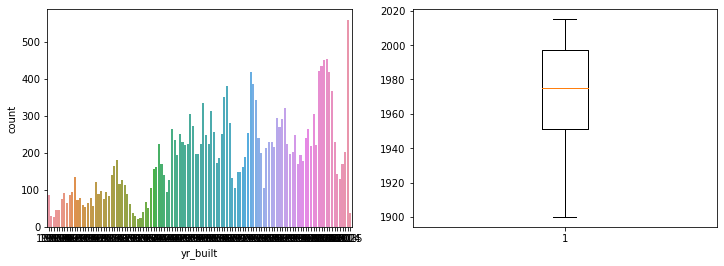

In [62]:
# Univariate analysis year_built
# Melihat Distribusi dari yr_built
# Semakin tua umur dari umur rumah,sedikit orang menjual rumah
# Data tidak memiliki outliers

f=plt.figure(figsize=(12,4))

f.add_subplot(1, 2, 1)
sns.countplot(df['yr_built'])

f.add_subplot(1, 2, 2)
plt.boxplot(df['yr_built'])
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x576 with 0 Axes>

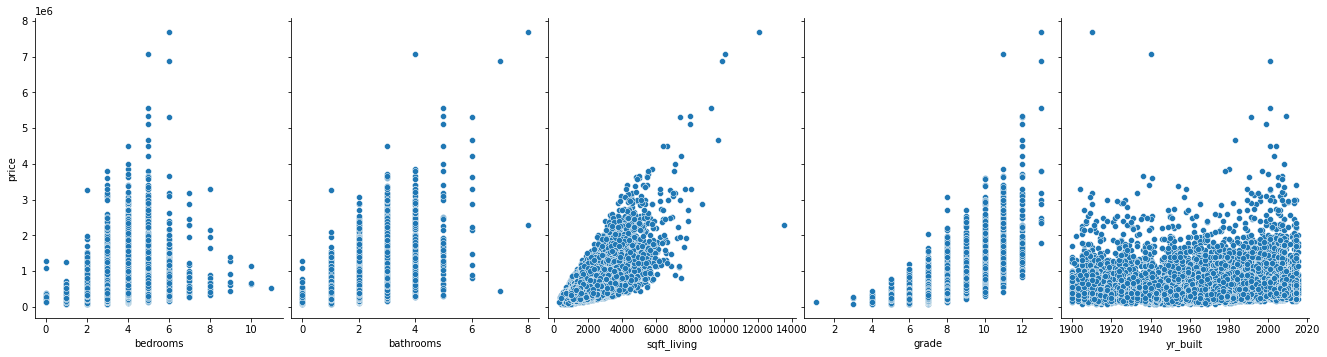

In [27]:
# Bivariate Analysis antara independent Variable dan dependent Variable
# Melihat hubungan antara independent dan dependent
# Menggunakan pairplot

plt.figure(figsize=(10,8))
sns.pairplot(data=df, x_vars=['bedrooms', 'bathrooms', 'sqft_living','grade', 'yr_built'], y_vars=['price'], size=5.
, aspect =0.75)
plt.show()



In [63]:
# Mengetahui Nilai Korelasi dari indepedent variable dan dependent Variable
df.corr().style.background_gradient().set_precision(2)

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
price,1.00,0.32,0.51,0.70,0.67,0.05
bedrooms,0.32,1.00,0.48,0.59,0.37,0.16
bathrooms,0.51,0.48,1.00,0.70,0.61,0.43
sqft_living,0.70,0.59,0.70,1.00,0.76,0.32
grade,0.67,0.37,0.61,0.76,1.00,0.45
yr_built,0.05,0.16,0.43,0.32,0.45,1.00


In [64]:
# Modeling
df.head()

,price,bedrooms,bathrooms,sqft_living,grade,yr_built
0,221900.0,3,1,1180,7,1955
1,538000.0,3,2,2570,7,1951
2,180000.0,2,1,770,6,1933
3,604000.0,4,3,1960,7,1965
4,510000.0,3,2,1680,8,1987


In [66]:
#Pertama, buat variabel x dan y
x = df.drop(columns='price')
y = df['price']

In [67]:
#Kedua, kita split data kita menjadi training and testing dengan porsi 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=4)

In [68]:
# Cek shape dari data training dan data set
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(17290, 5)
(17290,)
(4323, 5)
(4323,)


In [69]:
from sklearn.linear_model import LinearRegression


In [74]:
# Fit The model
lr_model= LinearRegression()
lr_model.fit(x_train, y_train)



LinearRegression()

In [79]:
# Cari tahu nilai slope/koefisien (m) dan intercept(b)
print(lr_model.coef_)
print(lr_model.intercept_)




[-53061.75464279  64658.55790616    188.90926343 131290.89536823
  -3969.55831454]
7031568.245717709


In [87]:
# Membuat ke dalam data Frame agar lebih baik
coef_dict={'feature':x.columns, 'coef_value':lr_model.coef_}
coef =pd.DataFrame(coef_dict,columns=['feature', 'coef_value'])

In [88]:
coef

,feature,coef_value
0,bedrooms,-53061.754643
1,bathrooms,64658.557906
2,sqft_living,188.909263
3,grade,131290.895368
4,yr_built,-3969.558315


In [89]:
y_pred=lr_model.predict(x_test)

In [90]:
#Keenam, kita cari tahu accuracy score dari model kita menggunakan testing data yang sudah displit
lr_model.score(x_test, y_test)

0.6125113286941102

In [91]:
# Prediksi harga rumah 
lr_model.predict([[3, 2, 1800, 7, 1990]])

array([361351.99342265])

In [ ]:
# Final harga Rumah 
# Mr.Brown sendiri ingin membeli rumah dengan jumlah kamar tidur itu 3, jumlah kamar mandinya itu 2, luas rumahnya itu 1800sqft, grade rumahnya 7 dan tahun pembangunanya pada tahun 1990
# adalah
Harga rumah idaman Mr.Brown dan istirnya adalah sekitar US$ 361351 